# Wing Aerodynamics Analysis using Vortex-Step Method (VSM) on a LEI Kite
This notebook demonstrates the process of setting up and analyzing a wing's aerodynamics using VSM on a LEI Kite. We'll cover the following steps:
1. Setting up the environment and importing necessary libraries.
2. Creating a wing object and adding sections to define the geometry from a CSV file.
3. Initializing the wing aerodynamics and set the inflow conditions.
4. Plotting 

## 1. Import necessary libraries
In this step, we import the necessary libraries for the aerodynamic analysis. We use:
- `numpy` for numerical operations.
- The `VSM` module for the aerodynamic modelling

Make sure the `VSM` module is properly installed in your (virtual) environment, by running the cmd: `pip install -e .` from the root-directory of this project

In [10]:
import numpy as np
import logging
import matplotlib.pyplot as plt
import pickle
import os
from pathlib import Path
from VSM.WingGeometry import Wing
from VSM.WingAerodynamics import WingAerodynamics
from VSM.Solver import Solver
from VSM.plotting import plot_polars, plot_distribution, plot_geometry

## 2. Creating a wing object and adding sections to define the geometry from a CSV file.

In [11]:
# Find the root directory of the repository
root_dir = os.getcwd()
while not os.path.isfile(os.path.join(root_dir, ".gitignore")):
    root_dir = os.path.abspath(os.path.join(root_dir, ".."))
    if root_dir == "/":
        raise FileNotFoundError("Could not find the root directory of the repository.")
save_folder = Path(root_dir) / "results" / "VSM"

# Defining discretisation
# n_panels = 54 # Delft
n_panels = 57 # Beyond
spanwise_panel_distribution = "split_provided"

### rib_list_from_CAD_LE_TE_and_surfplan_d_tube_camber_19ribs
csv_file_path = (
    Path(root_dir)
    / "processed_data"
    / "BEYOND_THE_SEA"
    / "SeaKite_50VH.csv"
)
(
    LE_x_array,
    LE_y_array,
    LE_z_array,
    TE_x_array,
    TE_y_array,
    TE_z_array,
    d_tube_array,
    camber_array,
# ) = np.loadtxt(csv_file_path, delimiter=",", skiprows=1, unpack=True) # Delft
 ) = np.loadtxt(csv_file_path, delimiter=";", skiprows=1, unpack=True) # Beyond

rib_list_from_CAD_LE_TE_and_surfplan_d_tube_camber_19ribs = []
for i in range(len(LE_x_array)):
    LE = np.array([LE_x_array[i], LE_y_array[i], LE_z_array[i]])
    TE = np.array([TE_x_array[i], TE_y_array[i], TE_z_array[i]])
    rib_list_from_CAD_LE_TE_and_surfplan_d_tube_camber_19ribs.append(
        [LE, TE, ["lei_airfoil_breukels", [d_tube_array[i], camber_array[i]]]]
    )
CAD_wing = Wing(n_panels, spanwise_panel_distribution)

for i, CAD_rib_i in enumerate(
    rib_list_from_CAD_LE_TE_and_surfplan_d_tube_camber_19ribs
):
    CAD_wing.add_section(CAD_rib_i[0], CAD_rib_i[1], CAD_rib_i[2])
wing_aero_CAD_19ribs = WingAerodynamics([CAD_wing])



## 3. Initializing the wing aerodynamics and set the inflow conditions.

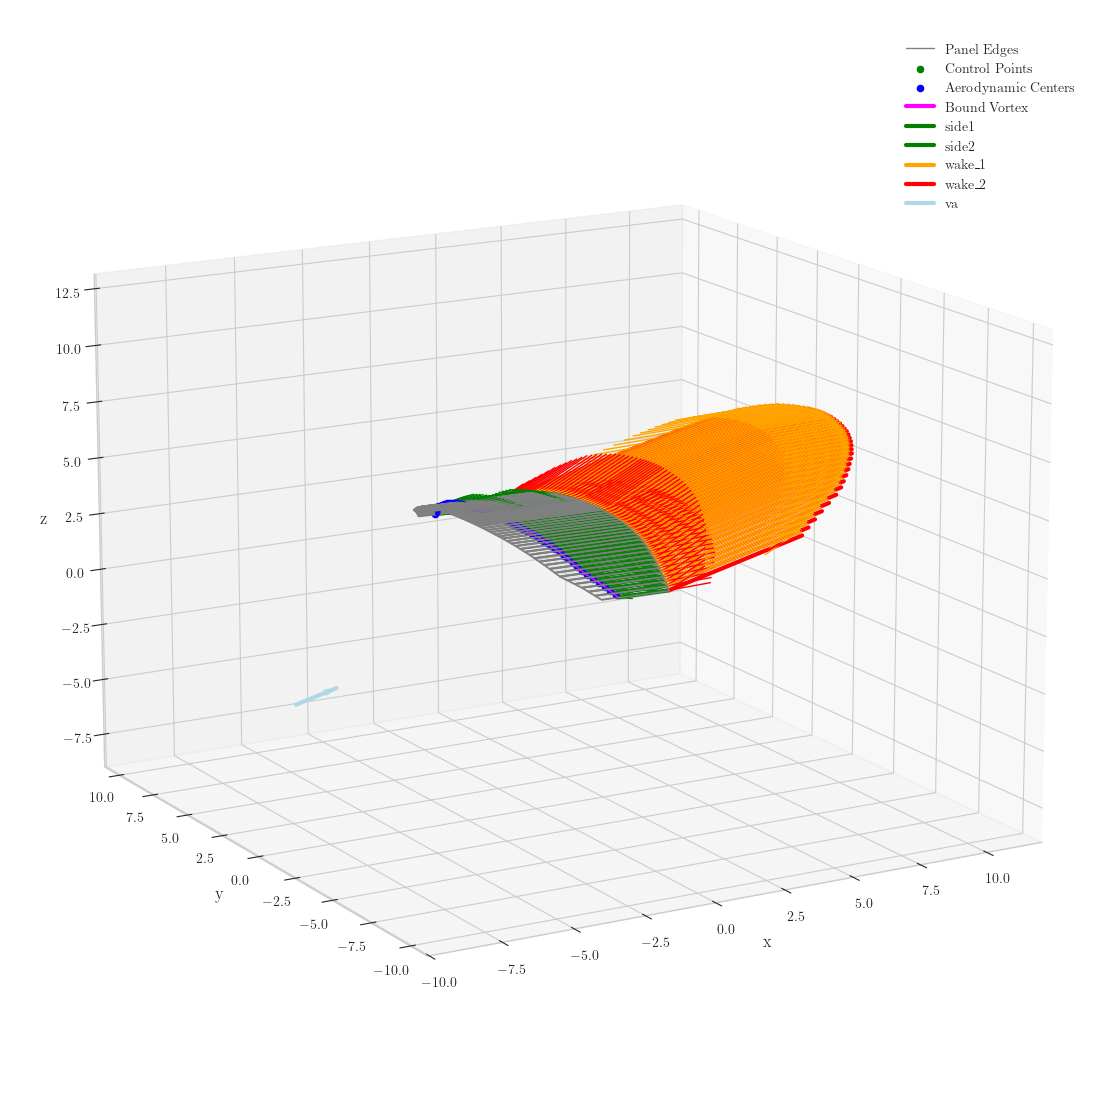

In [12]:
# Solvers
VSM = Solver(
    aerodynamic_model_type="VSM",
    is_with_artificial_damping=False,
)
VSM_with_stall_correction = Solver(
    aerodynamic_model_type="VSM",
    is_with_artificial_damping=True,
)

# setting va
Umag = 15
aoa = 17
side_slip = 0
yaw_rate = 0
aoa_rad = np.deg2rad(aoa)
vel_app = (
    np.array(
        [
            np.cos(aoa_rad) * np.cos(side_slip),
            np.sin(side_slip),
            np.sin(aoa_rad),
        ]
    )
    * Umag
)
wing_aero_CAD_19ribs.va = (vel_app, yaw_rate)

## Plotting
plot_geometry(
    wing_aero_CAD_19ribs,
    title=" ",
    data_type=".svg",
    save_path=" ",
    is_save=False,
    is_show=True,
    view_elevation=15,
    view_azimuth=-120,
)

## 4. Plotting 

INFO:root:Converged after 248 iterations
INFO:root:Converged after 223 iterations
INFO:root:Converged after 213 iterations
INFO:root:Converged after 205 iterations
INFO:root:Converged after 199 iterations
INFO:root:Converged after 195 iterations
INFO:root:Converged after 192 iterations
INFO:root:Converged after 189 iterations
INFO:root:Converged after 187 iterations
INFO:root:Converged after 185 iterations
INFO:root:Converged after 184 iterations
INFO:root:Converged after 183 iterations
INFO:root:Converged after 183 iterations
INFO:root:Converged after 184 iterations
INFO:root:Converged after 185 iterations
INFO:root:Converged after 186 iterations
INFO:root:Converged after 106 iterations
INFO:root:Converged after 108 iterations
INFO:root:Converged after 111 iterations
INFO:root:Converged after 114 iterations
INFO:root:Converged after 120 iterations
INFO:root:Converged after 126 iterations
INFO:root:Converged after 114 iterations
INFO:root:Converged after 155 iterations
INFO:root:Conver

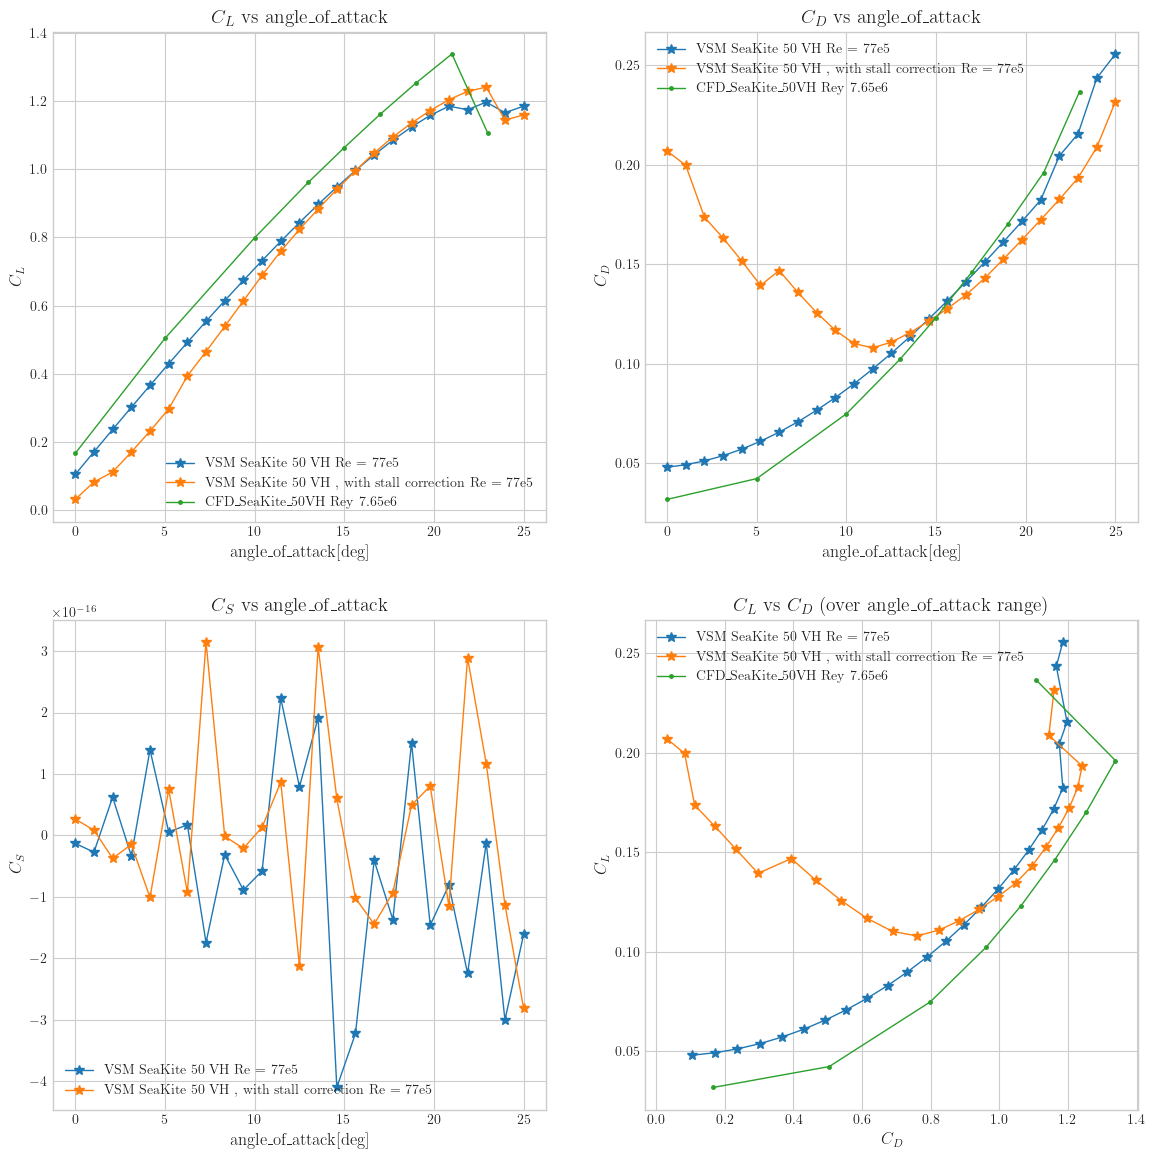

In [13]:
# ## Plotting
# plot_geometry(
#     wing_aero_CAD_19ribs,
#     title=" ",
#     data_type=".svg",
#     save_path=" ",
#     is_save=False,
#     is_show=True,
#     view_elevation=15,
#     view_azimuth=-120,
# )

# ### plotting distributions
# results = VSM.solve(wing_aero_CAD_19ribs)
# results_with_stall_correction = VSM_with_stall_correction.solve(wing_aero_CAD_19ribs)
# CAD_y_coordinates = [
#     panels.aerodynamic_center[1] for panels in wing_aero_CAD_19ribs.panels
# ]
# plot_distribution(
#     y_coordinates_list=[CAD_y_coordinates, CAD_y_coordinates],
#     results_list=[results, results_with_stall_correction],
#     label_list=["VSM", "VSM with stall correction"],
#     title=f"CAD_spanwise_distributions_alpha_{aoa:.1f}_beta_{side_slip:.1f}_yaw_{yaw_rate:.1f}_Umag_{Umag:.1f}",
#     data_type=".pdf",
#     save_path=Path(save_folder) / "spanwise_distributions",
#     is_save=False,
#     is_show=False,
# )

## plotting polar
save_path = Path(root_dir) / "results" / "TUD_V3_LEI_KITE"
# path_cfd_lebesque = ( # DELFT
#     Path(root_dir) # DELFT
#     / "data" # DELFT
#     / "TUDELFT_V3_LEI_KITE" # DELFT
#     / "literature_results" # DELFT
#     / "V3_CL_CD_RANS_Lebesque_2024_Rey_300e4.csv" # DELFT
# )

path_cfd_lebesque = ( # BEYOND
    Path(root_dir) # BEYOND
    / "data" # BEYOND
    / "BEYOND_THE_SEA" # BEYOND
    / "CFD_CL_CD_RANS_SeaKite50VH_Re_765e4.csv" # BEYOND
)

plot_polars(
    solver_list=[VSM, VSM_with_stall_correction],
    wing_aero_list=[
        wing_aero_CAD_19ribs,
        wing_aero_CAD_19ribs,
    ],
    label_list=[
        # "VSM CAD 19ribs", # DELFT
        # "VSM CAD 19ribs , with stall correction", # DELFT
        # "CFD_Lebesque Rey 30e5", # DELFT
        "VSM SeaKite 50 VH", # BEYOND
        "VSM SeaKite 50 VH , with stall correction", # BEYOND
        "CFD_SeaKite_50VH Rey 7.65e6", # BEYOND

    ],
    literature_path_list=[path_cfd_lebesque],
    angle_range=np.linspace(0, 25, 25),
    angle_type="angle_of_attack",
    angle_of_attack=0,
    side_slip=0,
    yaw_rate=0,
    Umag=25,
    title=f"tutorial_testing_stall_model_n_panels_{int(n_panels):.0f}_distribution_{spanwise_panel_distribution}",
    data_type=".pdf",
    save_path=Path(save_folder) / "polars",
    is_save=True,
    is_show=False,
)
